# 15. Visualizing Data

In [1]:
import polars as pl
pl.__version__

'1.20.0'

## NYC Bike Trips

In [2]:
trips = pl.read_parquet("data/citibike/*.parquet")

print(trips[:, :4])
print(trips[:, 4:7])
print(trips[:, 7:11])
print(trips[:, 11:])

shape: (2_465_048, 4)
┌───────────┬────────────┬─────────────────────────┬─────────────────────────┐
│ bike_type ┆ rider_type ┆ datetime_start          ┆ datetime_end            │
│ ---       ┆ ---        ┆ ---                     ┆ ---                     │
│ cat       ┆ cat        ┆ datetime[μs]            ┆ datetime[μs]            │
╞═══════════╪════════════╪═════════════════════════╪═════════════════════════╡
│ electric  ┆ member     ┆ 2024-03-01 00:00:02.490 ┆ 2024-03-01 00:27:39.295 │
│ electric  ┆ member     ┆ 2024-03-01 00:00:04.120 ┆ 2024-03-01 00:09:29.384 │
│ electric  ┆ casual     ┆ 2024-03-01 00:00:05.209 ┆ 2024-03-01 00:03:34.692 │
│ electric  ┆ member     ┆ 2024-03-01 00:00:09.837 ┆ 2024-03-01 00:11:42.320 │
│ electric  ┆ casual     ┆ 2024-03-01 00:00:13.270 ┆ 2024-03-01 00:18:41.243 │
│ …         ┆ …          ┆ …                       ┆ …                       │
│ classic   ┆ member     ┆ 2024-03-31 23:55:29.002 ┆ 2024-03-31 23:57:10.376 │
│ classic   ┆ member     ┆ 202

/tmp/ipykernel_26272/841677983.py:1: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance
  trips = pl.read_parquet("data/citibike/*.parquet")


## Built-In Plotting with Altair

### Introducing Altair

In [3]:
import altair as alt

### Methods in the Plot Namespaces

### Plotting DataFrames

In [4]:
trips_speed = trips.select(
    pl.col("distance"),
    pl.col("duration").dt.total_seconds() / 3600,
    pl.col("bike_type"),
).with_columns(speed=pl.col("distance") / pl.col("duration"))

trips_speed

distance,duration,bike_type,speed
f64,f64,cat,f64
4.8443,0.46,"""electric""",10.531087
2.667176,0.156944,"""electric""",16.994396
0.374287,0.058056,"""electric""",6.447045
3.090373,0.192222,"""electric""",16.077083
2.963459,0.3075,"""electric""",9.637267
…,…,…,…
0.272175,0.028056,"""classic""",9.701291
0.492269,0.058333,"""classic""",8.438897
0.406138,0.029444,"""classic""",13.793378


In [ ]:
# This raises a MaxRowsError:
# trips_speed.plot.scatter(
#    x="distance",
#    y="duration",
#    color="bike_type:N",
# )

In [5]:
trips_speed = (
    trips.filter(pl.col("station_start") == "W 70 St & Amsterdam Ave")
    .select(
        pl.col("distance"),
        pl.col("duration").dt.total_seconds() / 3600,
        pl.col("bike_type"),
    )
    .with_columns(speed=pl.col("distance") / pl.col("duration"))
)

trips_speed

distance,duration,bike_type,speed
f64,f64,cat,f64
0.590008,0.039167,"""electric""",15.064033
1.134568,0.153611,"""classic""",7.385977
4.569737,0.492778,"""electric""",9.273423
0.331841,0.027778,"""electric""",11.94629
6.143401,0.419167,"""electric""",14.656224
…,…,…,…
2.850176,0.172778,"""electric""",16.496196
0.590008,0.060833,"""classic""",9.698761
1.821509,0.133611,"""electric""",13.632919


In [6]:
trips_speed.plot.scatter(
    x="distance",
    y="duration",
    color="bike_type:N",
)

alt.Chart(...)

### Too Large to Handle

In [7]:
import altair as alt

alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [8]:
alt.data_transformers.enable("vegafusion")

DataTransformerRegistry.enable('vegafusion')

In [9]:
trips_type_counts = trips.group_by("rider_type", "bike_type").len()
trips_type_counts

rider_type,bike_type,len
cat,cat,u32
"""casual""","""electric""",275508
"""member""","""classic""",757485
"""member""","""electric""",1319418
"""casual""","""classic""",112637


In [10]:
from IPython.display import display

chart = trips_type_counts.plot.bar(
    x="rider_type", y="len", fill="bike_type:N"
).properties(
    width=300,
)
display(chart)

alt.Chart(...)

### Plotting Series

In [12]:
trips_speed["distance"].plot.kde()

alt.Chart(...)

In [11]:
trips_speed["distance"].plot.hist()

alt.Chart(...)

In [13]:
trips_hour_num_speed = (
    trips.sort("datetime_start")
    .group_by_dynamic("datetime_start", every="1h")
    .agg(
        num_trips=pl.len(),
        speed=(
            pl.col("distance") / (pl.col("duration").dt.total_seconds() / 3600)
        ).median(),
    )
    .filter(pl.col("datetime_start") > pl.date(2024, 3, 26))
)

trips_hour_num_speed

datetime_start,num_trips,speed
datetime[μs],u32,f64
2024-03-26 01:00:00,295,13.813106
2024-03-26 02:00:00,181,14.317642
2024-03-26 03:00:00,119,13.150871
2024-03-26 04:00:00,222,14.239003
2024-03-26 05:00:00,878,13.966456
…,…,…
2024-03-31 19:00:00,5170,10.692934
2024-03-31 20:00:00,3640,11.057322
2024-03-31 21:00:00,2813,11.429875


In [14]:
trips_hour_num_speed.plot.line(x="datetime_start", y="num_trips")

alt.Chart(...)

## pandas-Like Plotting with hvPlot

### Introducing hvPlot

In [15]:
import hvplot.polars

### A First Plot

In [16]:
trips_speed.hvplot.scatter(
    x="distance",
    y="duration",
    color="bike_type",
    xlabel="distance (km)",
    ylabel="duration (h)",
    ylim=(0, 2),
)

:Scatter   [distance]   (duration,bike_type)

### Methods in the hvPlot Namespace

### pandas as Backup

In [19]:
trips_per_day_hour = (
    trips.sort("datetime_start")
    .group_by_dynamic("datetime_start", every="1h")
    .agg(pl.len())
)

In [18]:
# This raises a ValueError:
# trips_per_day_hour.hvplot.heatmap(
#     x="datetime_start.hour", y="datetime_start.day", C="len", cmap="reds"
# )

In [20]:
import hvplot.pandas

trips_per_day_hour.to_pandas().hvplot.heatmap(
    x="datetime_start.hour", y="datetime_start.day", C="len", cmap="reds"
)

:HeatMap   [datetime_start.hour,datetime_start.day]   (len)

### Manual Transformations

In [21]:
trips_type_counts.hvplot.bar(
    x="rider_type",
    y="len",
    by="bike_type",
    ylabel="count",
    stacked=True,
    color=["orange", "green"],
)

:Bars   [rider_type,bike_type]   (len)

### Changing the Plotting Backend

In [22]:
import hvplot

hvplot.extension("matplotlib")

:Bars   [rider_type,bike_type]   (len)
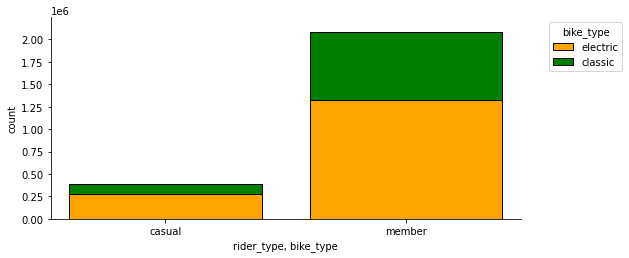

In [23]:
trips_type_counts.hvplot.bar(
    x="rider_type",
    y="len",
    by="bike_type",
    ylabel="count",
    stacked=True,
    color=["orange", "green"],
)

In [25]:
hvplot.extension("bokeh")

### Plotting Points on a Map

In [24]:
trips.hvplot.points(
    x="lon_start",
    y="lat_start",
    datashade=True,
    geo=True,
    tiles="CartoLight",
    width=800,
    height=600,
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'3aa2a546-1a8e-434e-9c3a-c103d68863a3': {'version…

### Composing Plots

In [26]:
(
    trips_hour_num_speed.hvplot.line(x="datetime_start", y="num_trips")
    + trips_hour_num_speed.hvplot.line(x="datetime_start", y="speed")
).cols(
    1
)

:Layout
   .Curve.I  :Curve   [datetime_start]   (num_trips)
   .Curve.II :Curve   [datetime_start]   (speed)

In [27]:
(
    trips_hour_num_speed.hvplot.line(x="datetime_start", y="num_trips")
    * trips_hour_num_speed.filter(pl.col("num_trips") > 9000).hvplot.scatter(
        x="datetime_start", y="num_trips", c="red", s=50
    )
)

:Overlay
   .Curve.I   :Curve   [datetime_start]   (num_trips)
   .Scatter.I :Scatter   [datetime_start]   (num_trips)

### Adding Interactive Widgets

In [28]:
trips_per_hour = (
    trips.sort("datetime_start")
    .group_by_dynamic("datetime_start", group_by="borough_start", every="1h")
    .agg(pl.len())
    .with_columns(date=pl.col("datetime_start").dt.date())
)
trips_per_hour

borough_start,datetime_start,len,date
str,datetime[μs],u32,date
"""Manhattan""",2024-03-01 00:00:00,406,2024-03-01
"""Manhattan""",2024-03-01 01:00:00,265,2024-03-01
"""Manhattan""",2024-03-01 02:00:00,167,2024-03-01
"""Manhattan""",2024-03-01 03:00:00,88,2024-03-01
"""Manhattan""",2024-03-01 04:00:00,113,2024-03-01
…,…,…,…
"""Queens""",2024-03-31 19:00:00,366,2024-03-31
"""Queens""",2024-03-31 20:00:00,317,2024-03-31
"""Queens""",2024-03-31 21:00:00,209,2024-03-31


In [29]:
trips_per_hour.hvplot.line(
    x="datetime_start",
    by="borough_start",
    groupby="date",
    widget_location="left_top",
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'9b8191e3-aa77-4bf9-9a7d-677838db2df6': {'version…

## Publication-Quality Graphics with plotnine

### Introducing plotnine

In [30]:
from plotnine import *

### Plots for Exploration

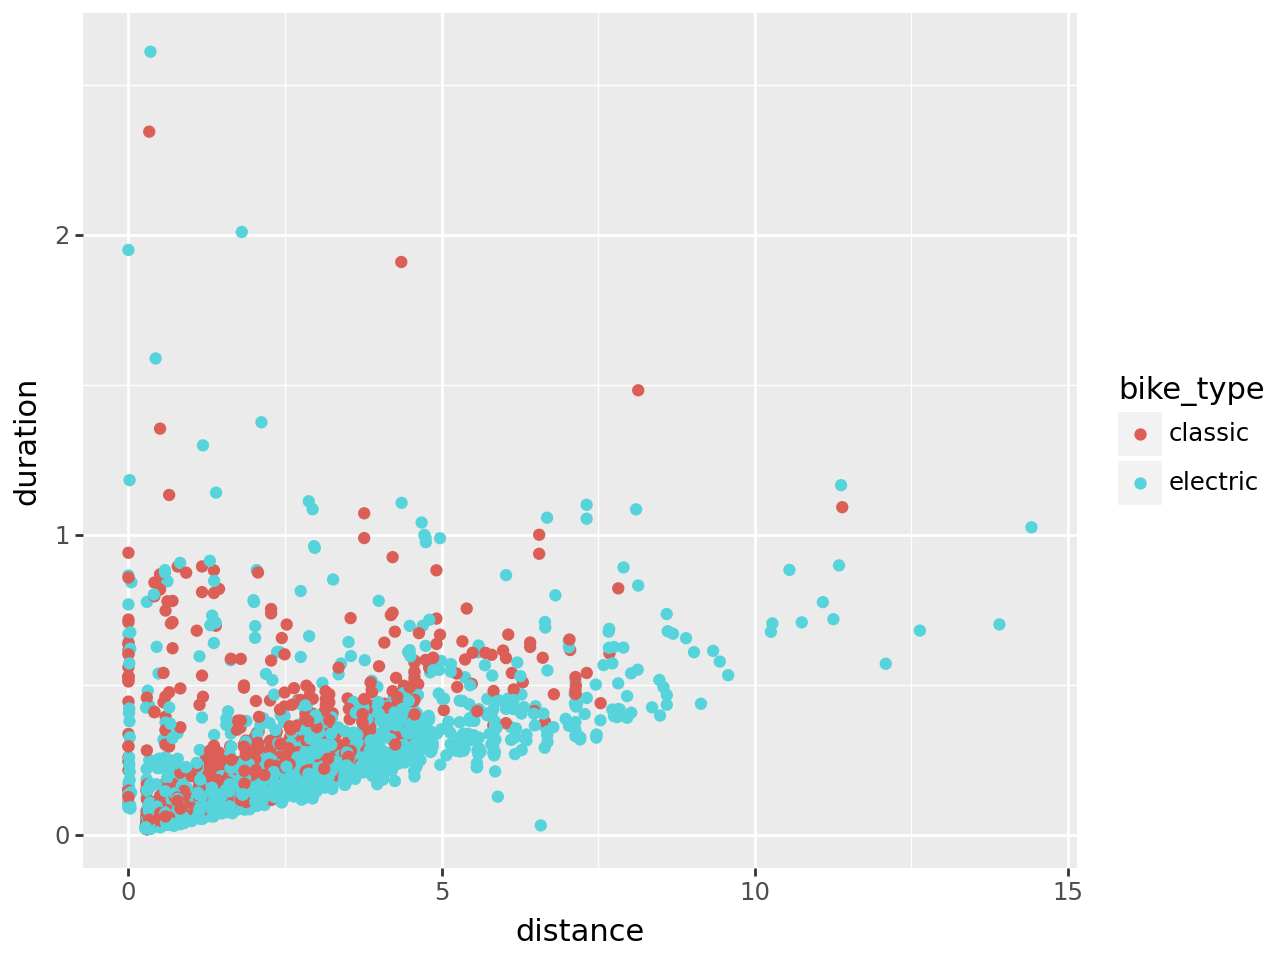

In [31]:
(
    ggplot(trips_speed, aes(x="distance", y="duration", color="bike_type"))
    + geom_point()
)

/home/prashant/Desktop/samosa/extra/books/code/python-polars-the-definitive-guide/python-polars-the-definitive-guide-main/.venv/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 67'. Pick better value with 'binwidth'.


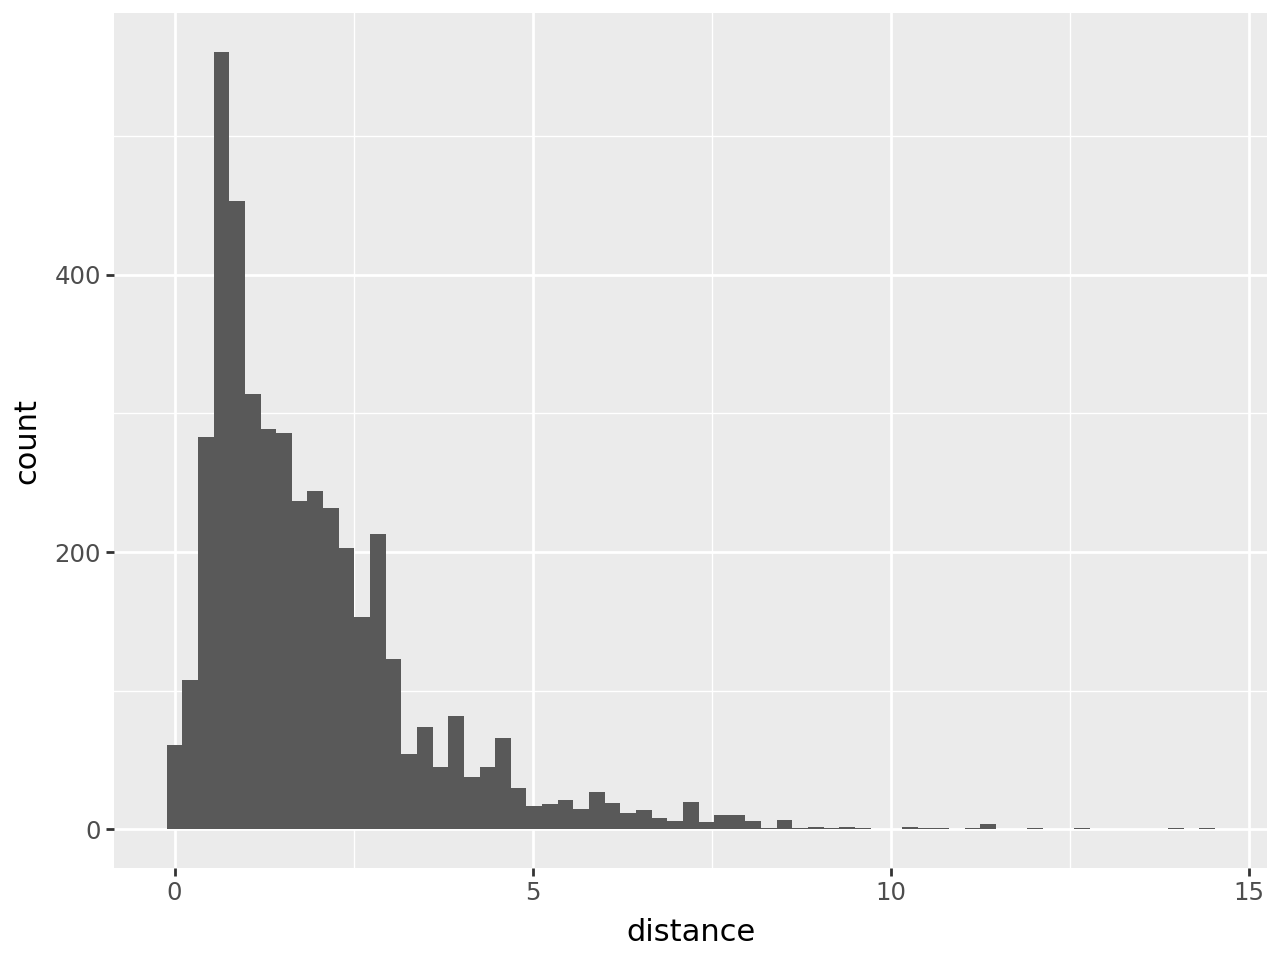

In [32]:
ggplot(trips_speed, aes(x="distance")) + geom_histogram()

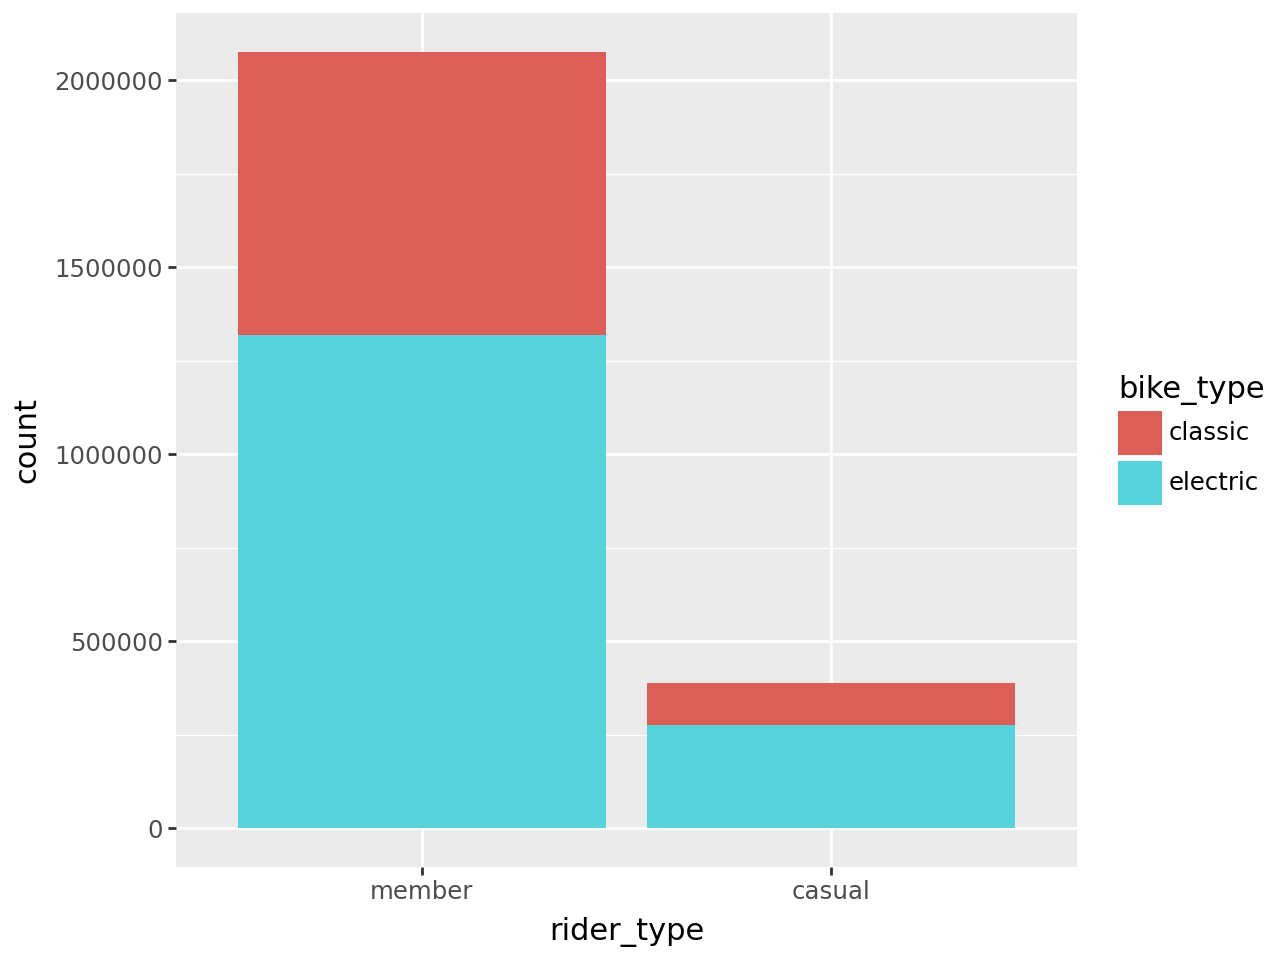

In [33]:
ggplot(trips, aes(x="rider_type", fill="bike_type")) + geom_bar()

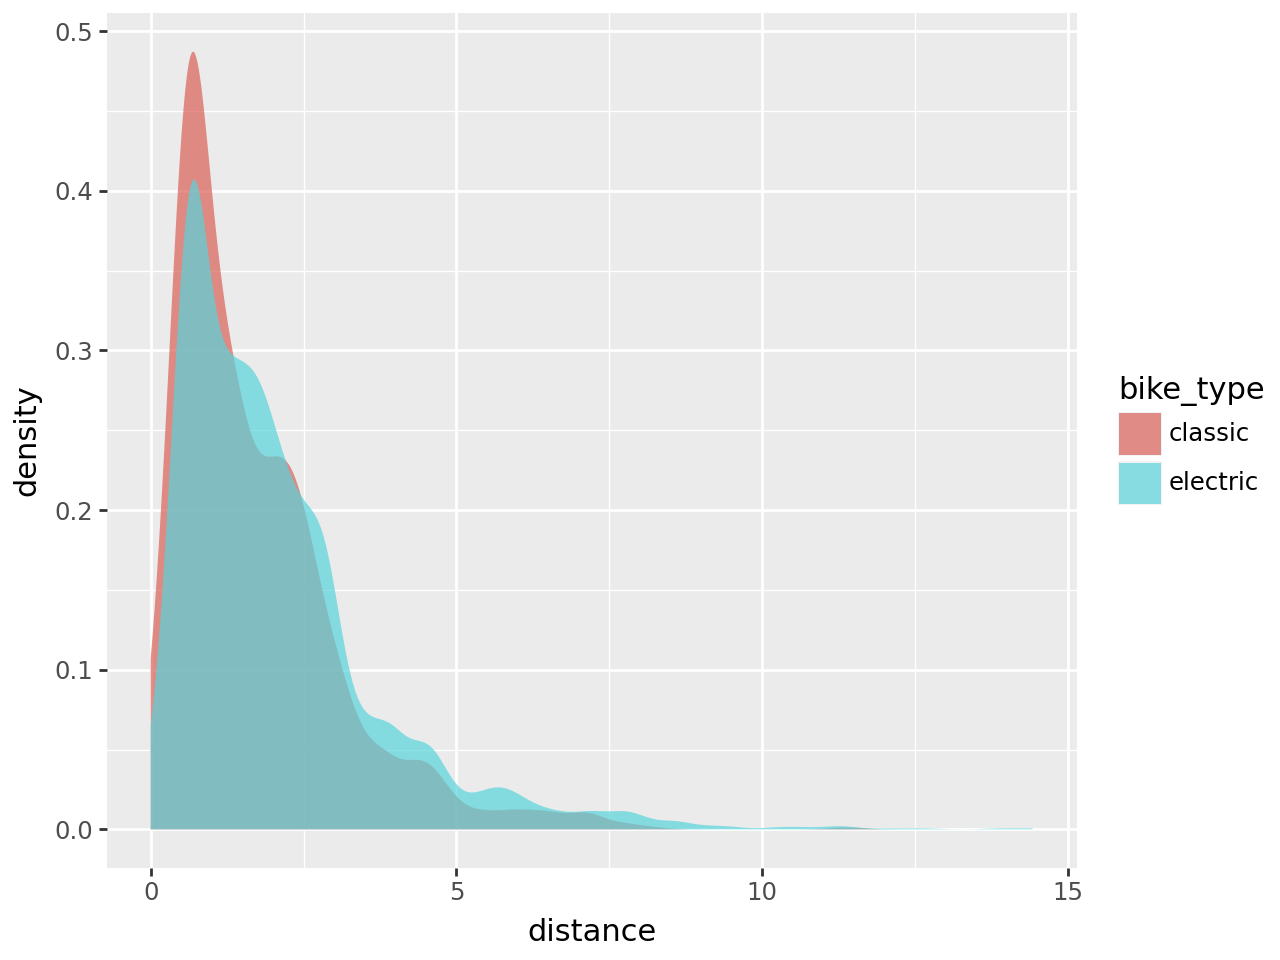

In [34]:
ggplot(trips_speed, aes(x="distance", fill="bike_type")) + geom_density(
    alpha=0.7, color="none"
)

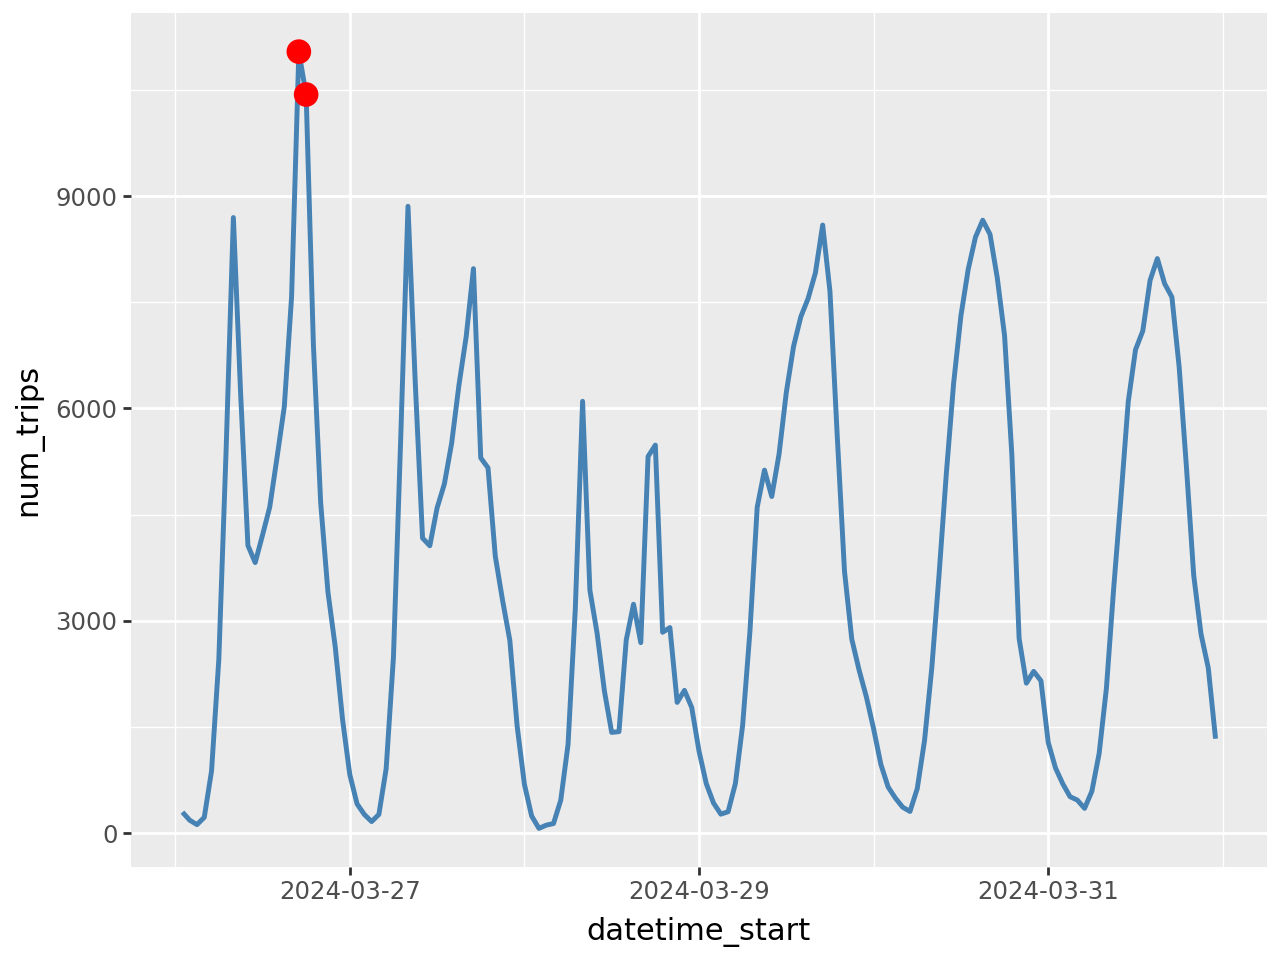

In [35]:
(
    ggplot(trips_hour_num_speed, aes(x="datetime_start", y="num_trips"))
    + geom_line(size=1, color="steelblue")
    + geom_point(
        data=trips_hour_num_speed.filter(pl.col("num_trips") > 9000),
        color="red",
        size=4,
    )
)

### Plots for Communication

In [36]:
trips_speed = (
    trips.group_by("neighborhood_start", "neighborhood_end")
    .agg(
        pl.col("duration").dt.total_seconds().median() / 60,
        pl.col("distance").median(),
        pl.col("borough_start").first(),
        pl.col("borough_end").first(),
        pl.len(),
    )
    .filter(
        (pl.col("len") > 30)
        & (pl.col("distance") > 0.2)
        & (pl.col("neighborhood_start") != pl.col("neighborhood_end")),
    )
    .with_columns(speed=pl.col("distance") / pl.col("duration"))
    .sort("borough_start")
)
trips_speed

neighborhood_start,neighborhood_end,duration,distance,borough_start,borough_end,len,speed
str,str,f64,f64,str,str,u32,f64
"""Concourse""","""Claremont Village""",9.041667,1.89847,"""Bronx""","""Bronx""",234,0.209969
"""Concourse""","""Washington Heights""",9.616667,1.64342,"""Bronx""","""Manhattan""",245,0.170893
"""Morris Heights""","""Claremont Village""",8.275,1.629147,"""Bronx""","""Bronx""",134,0.196876
"""Kingsbridge""","""West Farms""",18.375,3.809706,"""Bronx""","""Bronx""",54,0.207331
"""Mott Haven""","""Highbridge""",12.35,2.474492,"""Bronx""","""Bronx""",103,0.200364
…,…,…,…,…,…,…,…
"""Long Island City""","""Prospect Park""",37.416667,9.486938,"""Queens""","""Brooklyn""",37,0.253548
"""Middle Village""","""Maspeth""",8.716667,1.300111,"""Queens""","""Queens""",73,0.149152
"""Astoria""","""Ridgewood""",26.141667,6.668216,"""Queens""","""Queens""",44,0.25508


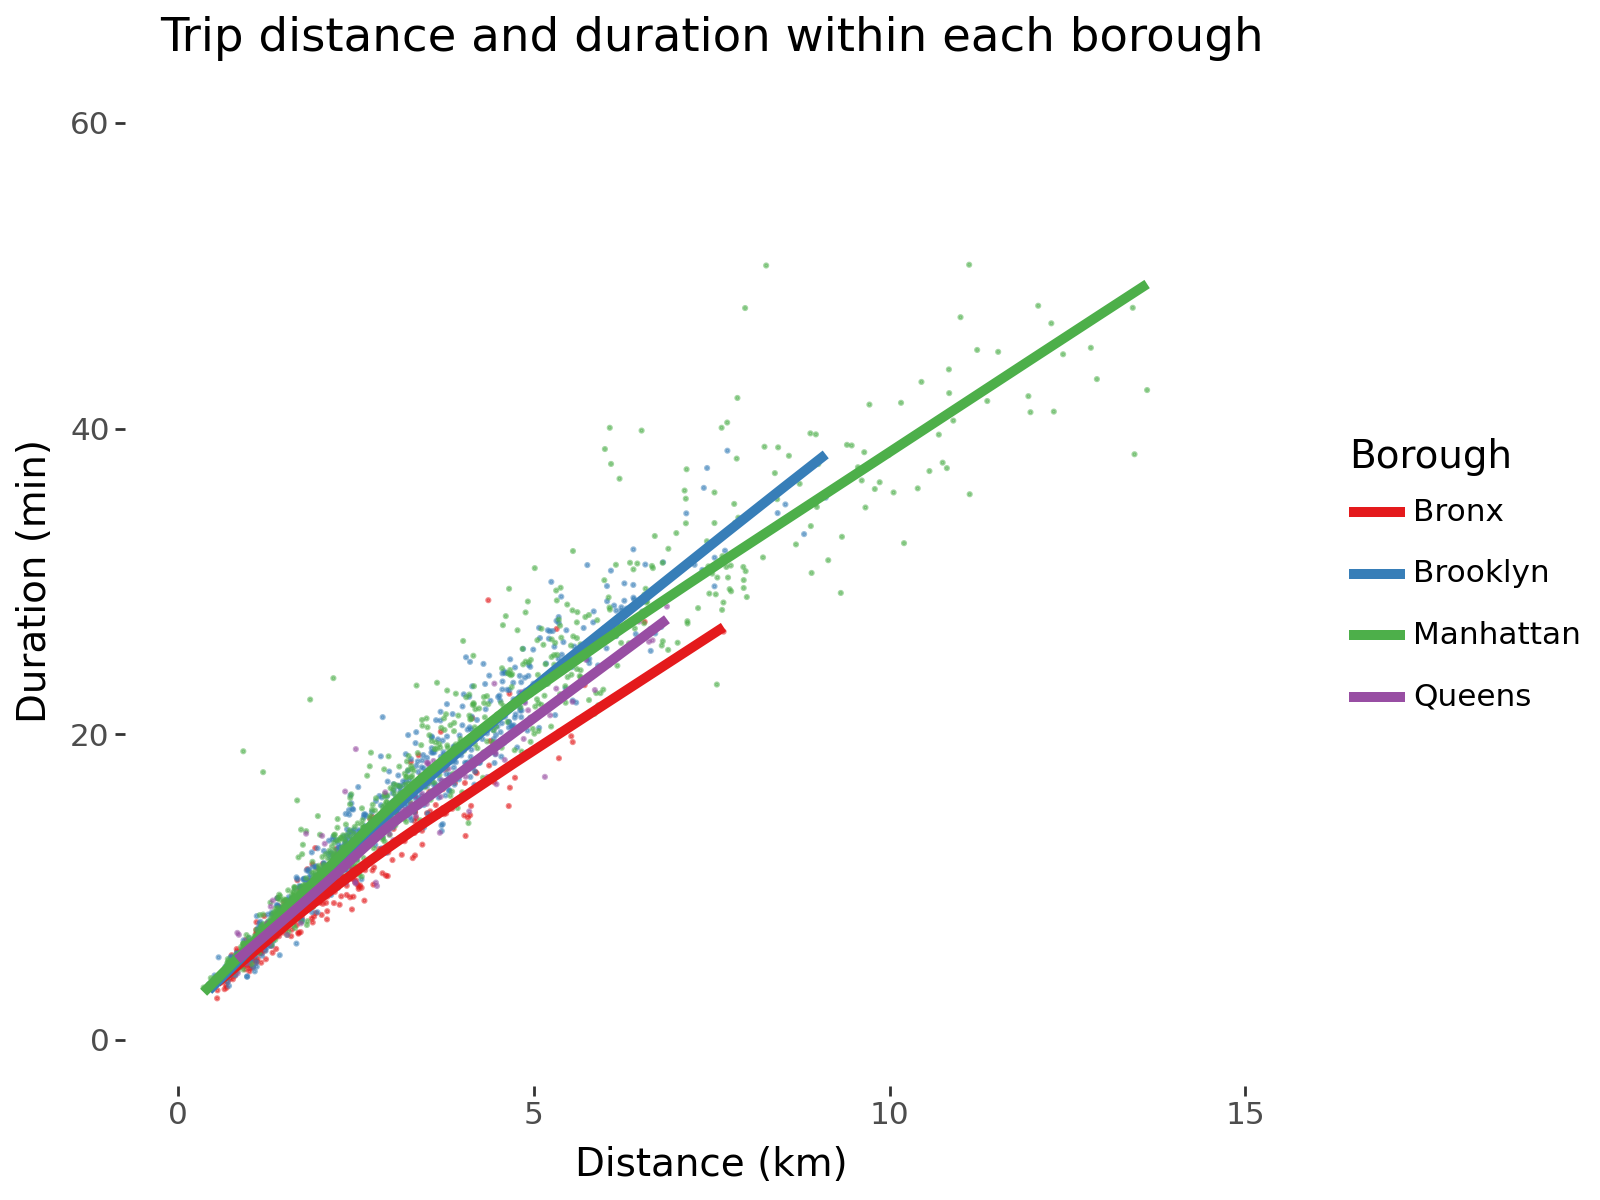

In [37]:
(
    ggplot(
        data=trips_speed.filter(
            pl.col("borough_start") == pl.col("borough_end")
        ),
        mapping=aes(x="distance", y="duration", color="borough_end"),
    )
    + geom_point(size=0.25, alpha=0.5)
    + geom_smooth(method="lowess", size=2, se=False, alpha=0.8)
    + xlim(0, 15)
    + ylim(0, 60)
    + scale_color_brewer(type="qualitative", palette="Set1")
    + labs(
        title="Trip distance and duration within each borough",
        x="Distance (km)",
        y="Duration (min)",
        color="Borough",
    )
    + theme_tufte(base_size=14)
    + theme(
        figure_size=(8, 6),
        plot_background=element_rect(color="#ffffff"),
    )
)

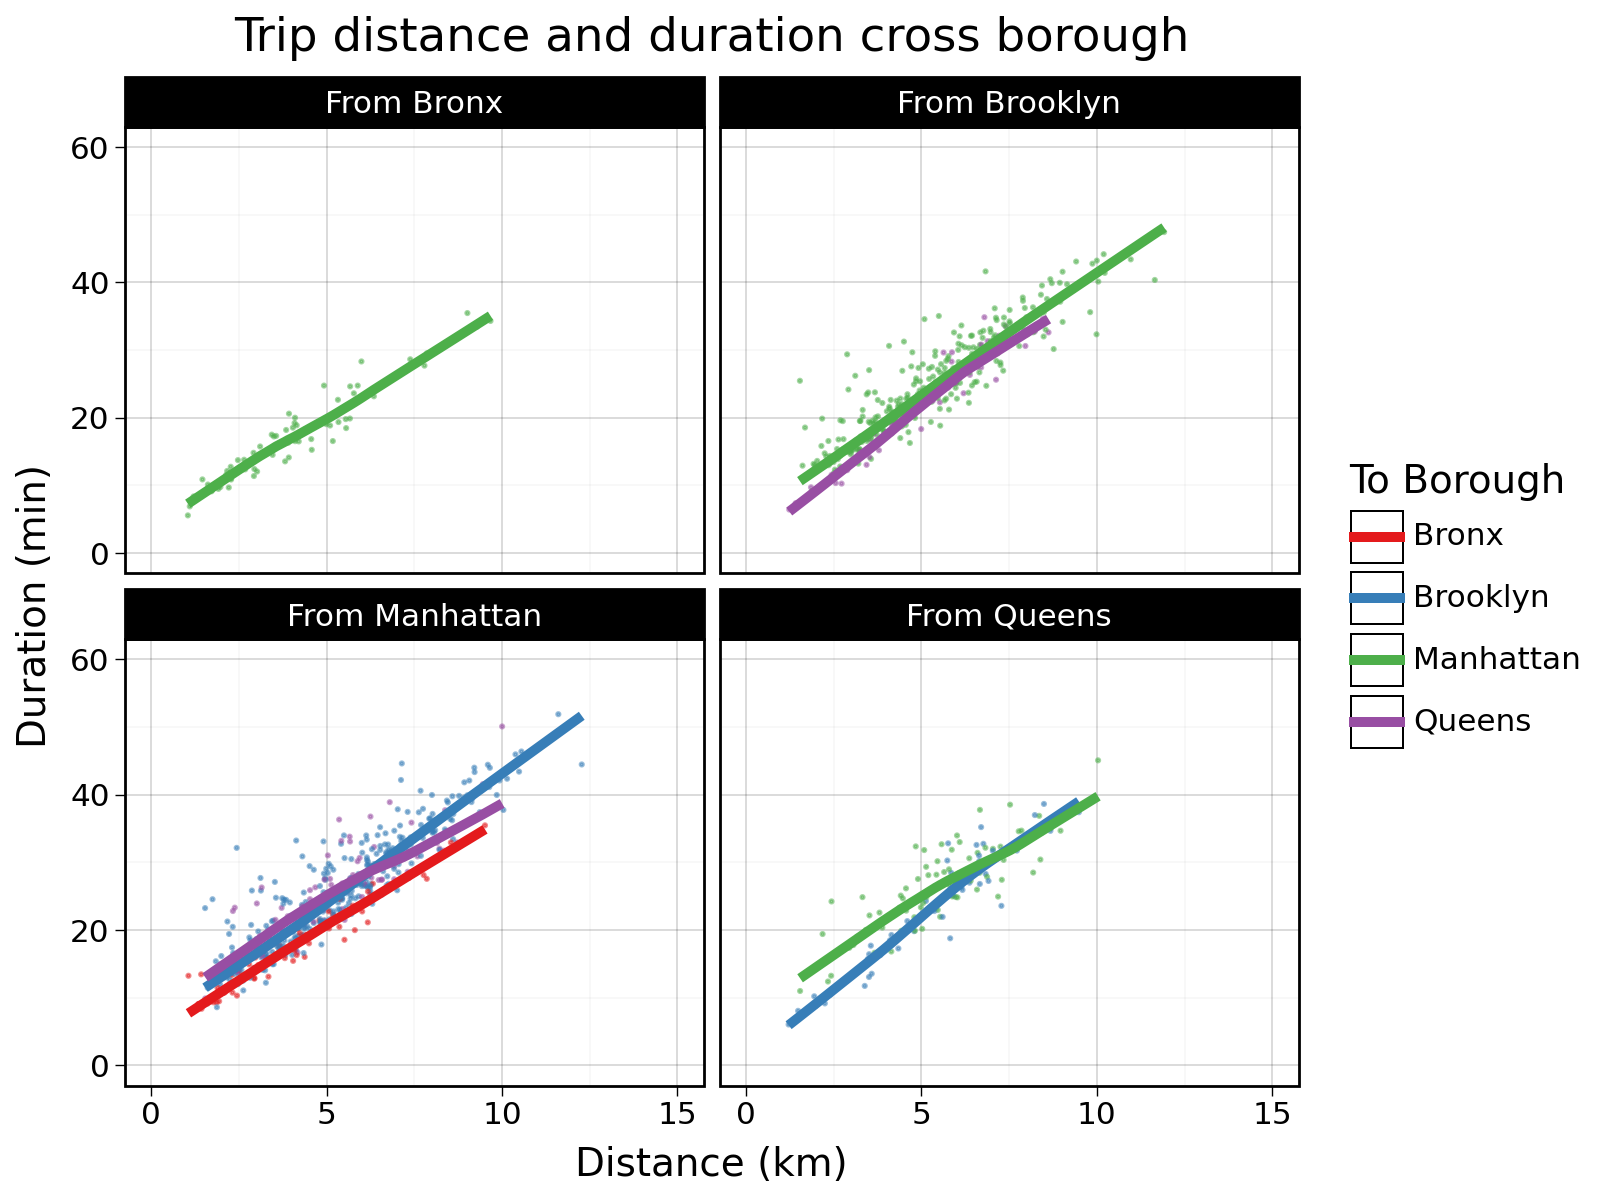

In [38]:
(
    ggplot(
        data=trips_speed.filter(
            pl.col("borough_start") != pl.col("borough_end")
        ).with_columns(
            ("From " + pl.col("borough_start")).alias("borough_start")
        ),
        mapping=aes(x="distance", y="duration", color="borough_end"),
    )
    + geom_point(size=0.25, alpha=0.5)
    + geom_smooth(method="lowess", size=2, se=False, alpha=0.8)
    + xlim(0, 15)
    + ylim(0, 60)
    + scale_color_brewer(type="qualitative", palette="Set1")
    + facet_wrap("borough_start")
    + labs(
        title="Trip distance and duration cross borough",
        x="Distance (km)",
        y="Duration (min)",
        color="To Borough",
    )
    + theme_linedraw(base_size=14)
    + theme(figure_size=(8, 6))
)

## Styling DataFrames With Great Tables

In [39]:
import polars.selectors as cs

busiest_stations = (
    trips.group_by(
        station=pl.col("station_start"), date=pl.col("datetime_start").dt.date()
    )
    .agg(
        borough=pl.col("borough_start").first(),
        neighborhood=pl.col("neighborhood_start").first(),
        num_rides=pl.len(),
        percent_member=(pl.col("rider_type") == "member").mean(),
        percent_electric=(pl.col("bike_type") == "electric").mean(),
    )
    .sort("date")
    .group_by("station")
    .agg(
        cs.string().first(),
        cs.numeric().mean(),
        pl.col("num_rides").alias("rides_per_day"),
    )
    .sort("num_rides", descending=True)
    .group_by("borough", maintain_order=True)
    .head(3)
)

busiest_stations

borough,station,neighborhood,num_rides,percent_member,percent_electric,rides_per_day
str,str,str,f64,f64,f64,list[u32]
"""Manhattan""","""W 21 St & 6 Ave""","""Chelsea""",338.483871,0.914255,0.582548,"[303, 82, … 306]"
"""Manhattan""","""Broadway & W 58 St""","""Midtown""",287.967742,0.797683,0.705107,"[184, 52, … 365]"
"""Manhattan""","""8 Ave & W 31 St""","""Chelsea""",269.580645,0.86593,0.642308,"[245, 74, … 286]"
"""Brooklyn""","""Metropolitan Ave & Bedford Ave""","""Williamsburg""",168.193548,0.854571,0.684266,"[141, 44, … 241]"
"""Brooklyn""","""N 7 St & Driggs Ave""","""Williamsburg""",134.129032,0.861574,0.654206,"[106, 38, … 147]"
…,…,…,…,…,…,…
"""Queens""","""Vernon Blvd & 50 Ave""","""Long Island City""",89.129032,0.888766,0.663969,"[78, 27, … 122]"
"""Queens""","""31 St & Newtown Ave""","""Astoria""",74.548387,0.88159,0.599703,"[71, 28, … 61]"
"""Bronx""","""Melrose Ave & E 150 St""","""Melrose""",39.225806,0.839402,0.89366,"[36, 10, … 38]"


In [40]:
from great_tables import GT

In [41]:
GT(busiest_stations)

borough,station,neighborhood,num_rides,percent_member,percent_electric,rides_per_day
Manhattan,W 21 St & 6 Ave,Chelsea,338.48387096774195,0.9142545495424969,0.5825484156668739,"[303, 82, 369, 390, 200, 200, 330, 341, 157, 278, 347, 461, 447, 392, 447, 415, 361, 385, 385, 361, 369, 366, 91, 370, 446, 480, 407, 210, 428, 369, 306]"
Manhattan,Broadway & W 58 St,Midtown,287.96774193548384,0.7976831965815243,0.7051065062895027,"[184, 52, 402, 250, 98, 122, 283, 277, 100, 146, 237, 320, 308, 330, 660, 766, 662, 267, 281, 284, 243, 237, 41, 210, 279, 304, 280, 172, 407, 360, 365]"
Manhattan,8 Ave & W 31 St,Chelsea,269.5806451612903,0.8659304899026222,0.642307780044684,"[245, 74, 219, 311, 146, 217, 277, 270, 73, 137, 284, 384, 359, 374, 406, 274, 277, 271, 395, 318, 350, 282, 62, 176, 347, 404, 336, 217, 344, 242, 286]"
Brooklyn,Metropolitan Ave & Bedford Ave,Williamsburg,168.19354838709677,0.8545709865691441,0.6842655833746254,"[141, 44, 195, 168, 91, 74, 167, 197, 74, 109, 130, 193, 185, 138, 219, 225, 269, 169, 158, 173, 176, 181, 88, 218, 211, 230, 180, 90, 224, 256, 241]"
Brooklyn,N 7 St & Driggs Ave,Williamsburg,134.1290322580645,0.8615735548467279,0.6542064323166892,"[106, 38, 153, 93, 83, 73, 125, 143, 62, 78, 121, 145, 159, 129, 183, 235, 171, 145, 172, 183, 152, 162, 35, 98, 151, 189, 172, 107, 169, 179, 147]"
Brooklyn,Hanson Pl & Ashland Pl,Fort Greene,133.8709677419355,0.8320357572483961,0.6156787459438283,"[123, 37, 105, 133, 87, 97, 135, 153, 44, 74, 142, 127, 162, 165, 230, 171, 161, 155, 177, 152, 148, 156, 29, 103, 150, 186, 165, 108, 168, 149, 158]"
Queens,Queens Plaza North & Crescent St,Long Island City,119.2258064516129,0.8508878841724375,0.5763287982521056,"[79, 30, 156, 139, 50, 56, 99, 124, 71, 102, 114, 179, 161, 159, 196, 220, 167, 133, 113, 100, 104, 103, 28, 91, 137, 163, 109, 71, 150, 159, 133]"
Queens,Vernon Blvd & 50 Ave,Long Island City,89.12903225806451,0.8887663688201306,0.6639691559966858,"[78, 27, 79, 84, 41, 53, 88, 79, 23, 31, 76, 99, 101, 96, 102, 46, 56, 109, 112, 88, 115, 132, 39, 103, 155, 152, 121, 113, 121, 122, 122]"
Queens,31 St & Newtown Ave,Astoria,74.54838709677419,0.8815901096229107,0.599702583762786,"[71, 28, 69, 91, 40, 56, 71, 75, 31, 44, 88, 105, 99, 84, 107, 62, 65, 112, 93, 92, 79, 86, 34, 70, 90, 93, 95, 53, 83, 84, 61]"
Bronx,Melrose Ave & E 150 St,Melrose,39.225806451612904,0.839402220847187,0.8936603820149811,"[36, 10, 30, 47, 36, 22, 59, 52, 19, 31, 36, 40, 60, 46, 73, 37, 39, 47, 43, 41, 45, 41, 10, 29, 43, 49, 47, 34, 48, 28, 38]"


In [42]:
from great_tables import style, md

(
    GT(busiest_stations)
    .tab_stub(rowname_col="station", groupname_col="borough")
    .cols_label(
        neighborhood="Neighborhood",
        num_rides="Mean Daily Rides",
        percent_member="Members",
        percent_electric="E-Bikes",
        rides_per_day="Rides Per Day",
    )
    .tab_header(
        title="Busiest Bike Stations in NYC",
        subtitle="In March 2024, Per Borough",
    )
    .tab_stubhead(label="Station")
    .fmt_number(columns="num_rides", decimals=1)
    .fmt_percent(columns=cs.starts_with("percent_"), decimals=0)
    .fmt_nanoplot(columns="rides_per_day", reference_line="mean")
    .data_color(columns="num_rides", palette="Blues")
    .tab_options(row_group_font_weight="bold")
    .tab_source_note(
        source_note=md(
            "Source: [NYC Citi Bike](https://citibikenyc.com/system-data)"
        )
    )
)

GT(_tbl_data=shape: (12, 7)
┌───────────┬──────────────┬──────────────┬────────────┬──────────────┬──────────────┬─────────────┐
│ borough   ┆ station      ┆ neighborhood ┆ num_rides  ┆ percent_memb ┆ percent_elec ┆ rides_per_d │
│ ---       ┆ ---          ┆ ---          ┆ ---        ┆ er           ┆ tric         ┆ ay          │
│ str       ┆ str          ┆ str          ┆ f64        ┆ ---          ┆ ---          ┆ ---         │
│           ┆              ┆              ┆            ┆ f64          ┆ f64          ┆ list[u32]   │
╞═══════════╪══════════════╪══════════════╪════════════╪══════════════╪══════════════╪═════════════╡
│ Manhattan ┆ W 21 St & 6  ┆ Chelsea      ┆ 338.483871 ┆ 0.914255     ┆ 0.582548     ┆ [303, 82, … │
│           ┆ Ave          ┆              ┆            ┆              ┆              ┆ 306]        │
│ Manhattan ┆ Broadway & W ┆ Midtown      ┆ 287.967742 ┆ 0.797683     ┆ 0.705107     ┆ [184, 52, … │
│           ┆ 58 St        ┆              ┆            ┆              ┆              ┆ 365]        │
│ Manhattan ┆ 8 Ave & W 31 ┆ Chelsea      ┆ 269.580645 ┆ 0.86593      ┆ 0.642308     ┆ [245, 74, … │
│           ┆ St           ┆              ┆            ┆              ┆              ┆ 286]        │
│ Brooklyn  ┆ Metropolitan ┆ Williamsburg ┆ 168.193548 ┆ 0.854571     ┆ 0.684266     ┆ [141, 44, … │
│           ┆ Ave &        ┆              ┆            ┆              ┆              ┆ 241]        │
│           ┆ Bedford Ave  ┆              ┆            ┆              ┆              ┆             │
│ Brooklyn  ┆ N 7 St &     ┆ Williamsburg ┆ 134.129032 ┆ 0.861574     ┆ 0.654206     ┆ [106, 38, … │
│           ┆ Driggs Ave   ┆              ┆            ┆              ┆              ┆ 147]        │
│ …         ┆ …            ┆ …            ┆ …          ┆ …            ┆ …            ┆ …           │
│ Queens    ┆ Vernon Blvd  ┆ Long Island  ┆ 89.129032  ┆ 0.888766     ┆ 0.663969     ┆ [78, 27, …  │
│           ┆ & 50 Ave     ┆ City         ┆            ┆              ┆              ┆ 122]        │
│ Queens    ┆ 31 St &      ┆ Astoria      ┆ 74.548387  ┆ 0.88159      ┆ 0.599703     ┆ [71, 28, …  │
│           ┆ Newtown Ave  ┆              ┆            ┆              ┆              ┆ 61]         │
│ Bronx     ┆ Melrose Ave  ┆ Melrose      ┆ 39.225806  ┆ 0.839402     ┆ 0.89366      ┆ [36, 10, …  │
│           ┆ & E 150 St   ┆              ┆            ┆              ┆              ┆ 38]         │
│ Bronx     ┆ E 161 St &   ┆ Concourse    ┆ 33.290323  ┆ 0.735161     ┆ 0.879332     ┆ [25, 9, …   │
│           ┆ River Ave    ┆              ┆            ┆              ┆              ┆ 50]         │
│ Bronx     ┆ Plaza Dr & W ┆ Mount Eden   ┆ 29.612903  ┆ 0.838673     ┆ 0.945555     ┆ [27, 16, …  │
│           ┆ 170 St       ┆              ┆            ┆              ┆              ┆ 33]         │
└───────────┴──────────────┴──────────────┴────────────┴──────────────┴──────────────┴─────────────┘, _body=<great_tables._gt_data.Body object at 0x7bc929b29460>, _boxhead=Boxhead([ColInfo(var='borough', type=<ColInfoTypeEnum.row_group: 3>, column_label='borough', column_align='left', column_width=None), ColInfo(var='station', type=<ColInfoTypeEnum.stub: 2>, column_label='station', column_align='left', column_width=None), ColInfo(var='neighborhood', type=<ColInfoTypeEnum.default: 1>, column_label='Neighborhood', column_align='left', column_width=None), ColInfo(var='num_rides', type=<ColInfoTypeEnum.default: 1>, column_label='Mean Daily Rides', column_align='right', column_width=None), ColInfo(var='percent_member', type=<ColInfoTypeEnum.default: 1>, column_label='Members', column_align='right', column_width=None), ColInfo(var='percent_electric', type=<ColInfoTypeEnum.default: 1>, column_label='E-Bikes', column_align='right', column_width=None), ColInfo(var='rides_per_day', type=<ColInfoTypeEnum.default: 1>, column_label='Rides Per Day', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7